# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

In [4]:
# Create a Beautiful Soup object
html = browser.html
weather_soup = soup(html, 'html.parser')

In [12]:
# Extract all rows of data
table = weather_soup.find("table")
headers = table.find_all("th")
rows = table.find_all("tr", class_="data-row")

### Step 3: Store the Data

Column headings:
* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [13]:
# Create an empty list
data = []
# Loop through the scraped data to create a list of rows
for row in rows:
    # Extract the cells from each row
    cells = row.find_all("td")
    # Extract the text from each cell and store it in a list
    row_data = [cell.text.strip() for cell in cells]
    # Add the row data to the list
    data.append(row_data)

In [20]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
column_names = [header.text.strip() for header in headers]
weather_df = pd.DataFrame(data[1:], columns=column_names)

In [21]:
# Confirm DataFrame was created successfully
weather_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,13,2012-08-17,11,156,6,-76.0,740.0
1,24,2012-08-18,12,156,6,-76.0,741.0
2,35,2012-08-19,13,157,6,-74.0,732.0
3,46,2012-08-20,14,157,6,-74.0,740.0
4,57,2012-08-21,15,158,6,-78.0,740.0
...,...,...,...,...,...,...,...
1861,1889,2018-02-23,1973,133,5,-78.0,730.0
1862,1892,2018-02-24,1974,134,5,-77.0,729.0
1863,1894,2018-02-25,1975,134,5,-76.0,729.0
1864,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

In [22]:
# Examine data type of each column
weather_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [24]:
# Change data types for data analysis
weather_df["terrestrial_date"] = pd.to_datetime(weather_df["terrestrial_date"])
weather_df["sol"] = weather_df["sol"].astype(int)
weather_df["ls"] = weather_df["ls"].astype(int)
weather_df["month"] = weather_df["month"].astype(int)
weather_df["min_temp"] = weather_df["min_temp"].astype(float)
weather_df["pressure"] = weather_df["pressure"].astype(float)

In [25]:
# Confirm type changes were successful by examining data types again
weather_df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)?
4. Which months have the lowest and the highest atmospheric pressure on Mars?
5. About how many terrestrial (Earth) days exist in a Martian year?

In [33]:
# 1. How many months are there on Mars?
months = weather_df["month"].nunique()
print("Months on Mars:", months)

Months on Mars: 12


In [34]:
# Count the occurrences of each month
month_counts = weather_df["month"].value_counts()
month_counts = month_counts.sort_index()
month_counts

1     174
2     178
3     192
4     194
5     149
6     146
7     142
8     141
9     134
10    112
11    138
12    166
Name: month, dtype: int64

In [39]:
# 2. How many Martian days' worth of data are there?
martian_days = weather_df["sol"].nunique()
print("Number of Martian days' worth of data:", martian_days)

Number of Martian days' worth of data: 1866


In [40]:
# 3. What is the average low temperature by month?
avg_min = weather_df.groupby("month")["min_temp"].mean()
avg_min

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.301370
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

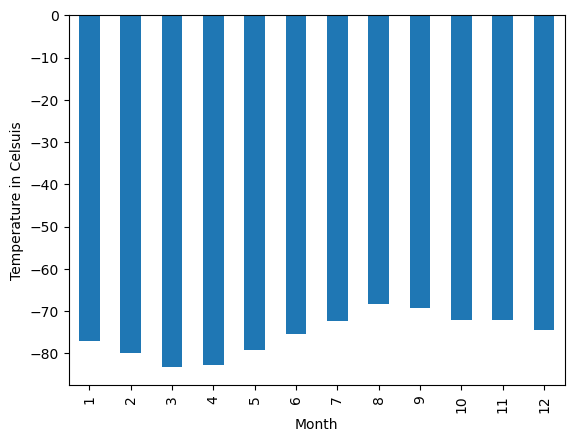

In [43]:
# Plot the average temperature by month
avg_min.plot(kind="bar")
plt.ylabel("Temperature in Celsuis")
plt.xlabel("Month")
plt.show()

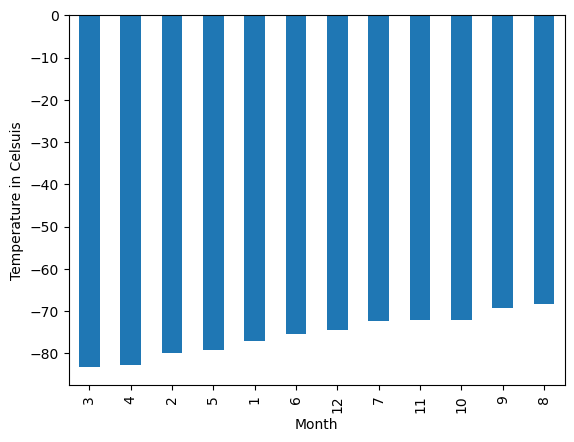

Coldest month: 3
Warmest month: 8


In [45]:
# Identify the coldest and hottest months in Curiosity's location
avg_min_sorted = avg_min.sort_values()
avg_min_sorted.plot(kind="bar")
plt.ylabel("Temperature in Celsuis")
plt.xlabel("Month")
plt.show()

print("Coldest month: 3")
print("Warmest month: 8")

In [46]:
# 4. Average pressure by Martian month
avg_pressure = weather_df.groupby("month")["pressure"].mean()
avg_pressure

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.095890
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

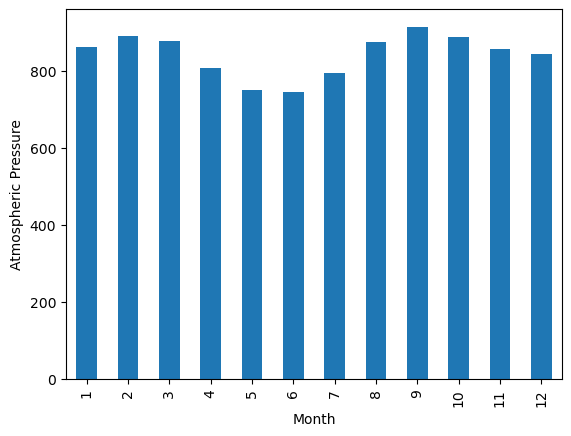

In [47]:
# Plot the average pressure by month
avg_pressure.plot(kind="bar")
plt.ylabel("Atmospheric Pressure")
plt.xlabel("Month")
plt.show()

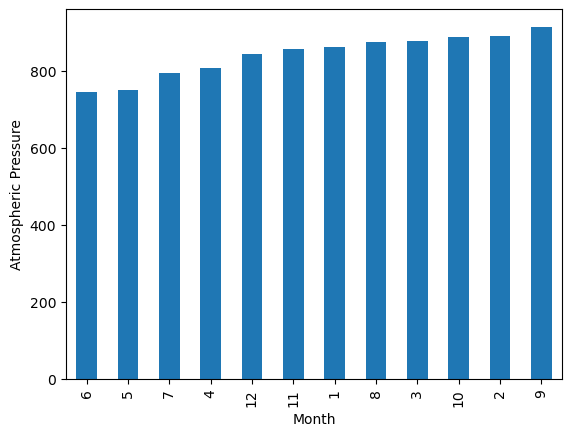

Month with highest pressure: 9
Month with lowest pressure: 6


In [50]:
# Identify the months with the highest and lowest pressure in Curiosity's location
avg_pressure_sorted = avg_pressure.sort_values()
avg_pressure_sorted.plot(kind="bar")
plt.ylabel("Atmospheric Pressure")
plt.xlabel("Month")
plt.show()

print("Month with highest pressure: 9")
print("Month with lowest pressure: 6")

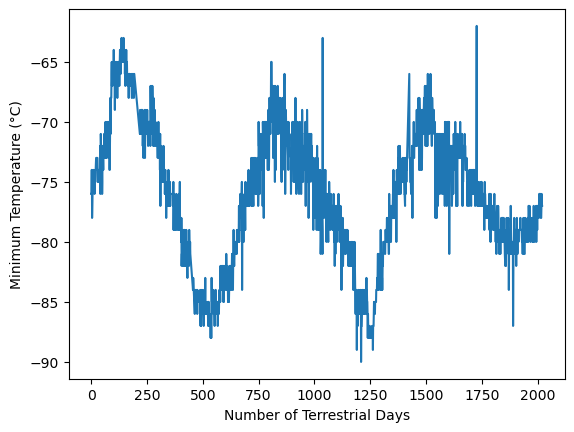

In [54]:
# 5. How many terrestrial (earth) days are there in a Martian year?
# Calculate the number of terrestrial days
weather_df['terrestrial_days'] = (weather_df['terrestrial_date'] - weather_df['terrestrial_date'].min()).dt.days

# Plot the daily minimum temperature against the number of terrestrial days
plt.plot(weather_df['terrestrial_days'], weather_df['min_temp'])
plt.xlabel('Number of Terrestrial Days')
plt.ylabel('Minimum Temperature (°C)')
plt.show()

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

In [58]:
# Export the DataFrame to a CSV file
weather_df.to_csv('weather_data.csv', index=False)

In [57]:
browser.quit()